In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [66]:
df = pd.read_csv("/Users/shubhamyadav/Downloads/amazon.csv")

In [3]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [4]:
df['reviewText'].values[0]

'No issues.'

In [5]:
print(df.shape)

(4915, 12)


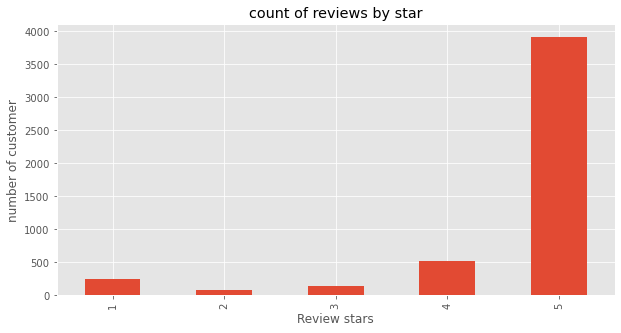

In [6]:
##EDT(equities and derivative training)
ax = df['overall'].value_counts().sort_index() \
     .plot(kind = 'bar',
           title='count of reviews by star', 
           figsize=(10,5))

ax.set_xlabel('Review stars')

ax.set_ylabel("number of customer")
plt.show()

In [7]:
##Basic NLTK

review = df['reviewText'][50]
print(review)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shubhamyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
tokens = nltk.word_tokenize(review)
tokens[:10]

['A', 'memory', 'card', 'either', 'works', 'or', 'it', 'does', "n't", '.']

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shubhamyadav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('A', 'DT'),
 ('memory', 'NN'),
 ('card', 'NN'),
 ('either', 'CC'),
 ('works', 'VBZ'),
 ('or', 'CC'),
 ('it', 'PRP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('.', '.')]

In [12]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/shubhamyadav/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
entities = nltk.chunk.ne_chunk(tagged)

In [14]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/shubhamyadav/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  A/DT
  memory/NN
  card/NN
  either/CC
  works/VBZ
  or/CC
  it/PRP
  does/VBZ
  n't/RB
  ./.
  This/DT
  was/VBD
  always/RB
  going/VBG
  to/TO
  be/VB
  a/DT
  one/CD
  star/NN
  or/CC
  five/CD
  star/NN
  review/NN
  -/:
  no/DT
  middle/JJ
  ground.The/NN
  adapter/NN
  is/VBZ
  a/DT
  nice/JJ
  bonus/NN
  too/RB
  ,/,
  though/IN
  I/PRP
  do/VBP
  n't/RB
  think/VB
  I/PRP
  have/VBP
  anything/NN
  to/TO
  use/VB
  it/PRP
  with/IN
  ./.)


In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shubhamyadav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [19]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [20]:
##Analysis of the review
sia.polarity_scores(review)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [21]:
#run the polarity score on the whole dataset
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [22]:
#run the polarity score on whole dataset
res = {}
sia = SentimentIntensityAnalyzer()

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myname = row['reviewerName']
    
    if isinstance(text, str):  # Check if the text is a string
        res[myname] = sia.polarity_scores(text)
    else:
        res[myname] = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}


In [23]:
res

{nan: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296},
 '0mie': {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296},
 '1K3': {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.3089},
 '1m2': {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.7081},
 '2&amp;1/2Men': {'neg': 0.038,
  'neu': 0.835,
  'pos': 0.127,
  'compound': 0.7087},
 '2Cents!': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 '2K1Toaster': {'neg': 0.063, 'neu': 0.745, 'pos': 0.192, 'compound': 0.8992},
 '35-year Technology Consumer "8-tracks to 802.11"': {'neg': 0.044,
  'neu': 0.833,
  'pos': 0.123,
  'compound': 0.7768},
 '4evryoung': {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.296},
 '53rdcard': {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9167},
 '808TREX50': {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258},
 '98020': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 '9z4cda': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'A4Q9

In [24]:
pd.DataFrame(res).T

,neg,neu,pos,compound
NaN,0.688,0.312,0.000,-0.2960
0mie,0.075,0.925,0.000,-0.2960
1K3,0.077,0.923,0.000,-0.3089
1m2,0.000,0.909,0.091,0.7081
2&amp;1/2Men,0.038,0.835,0.127,0.7087
...,...,...,...,...
"ZM ""J""",0.091,0.817,0.092,0.0018
Zo,0.000,0.939,0.061,0.1761
Z S Liske,0.000,0.828,0.172,0.8588
Z Taylor,0.000,0.802,0.198,0.4939


In [25]:
#now we have sentiment score and metadata
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'reviewerName'})
vaders = vaders.merge(df, how='left')

In [26]:
vaders

,reviewerName,neg,neu,pos,compound,Unnamed: 0,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,0.688,0.312,0.000,-0.2960,0,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,0.075,0.925,0.000,-0.2960,1,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,0.077,0.923,0.000,-0.3089,2,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,0.000,0.909,0.091,0.7081,3,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,0.038,0.835,0.127,0.7087,4,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",0.091,0.817,0.092,0.0018,4910,1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,Zo,0.000,0.939,0.061,0.1761,4911,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,Z S Liske,0.000,0.828,0.172,0.8588,4912,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,Z Taylor,0.000,0.802,0.198,0.4939,4913,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


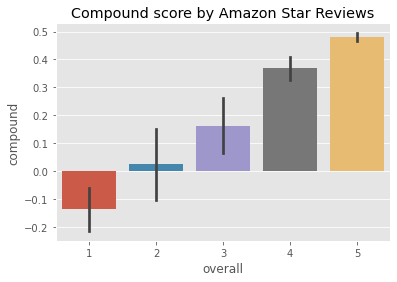

In [27]:
ax = sns.barplot(data= vaders, x = 'overall', y = 'compound')
ax.set_title('Compound score by Amazon Star Reviews')
plt.show()

<AxesSubplot:xlabel='overall', ylabel='pos'>

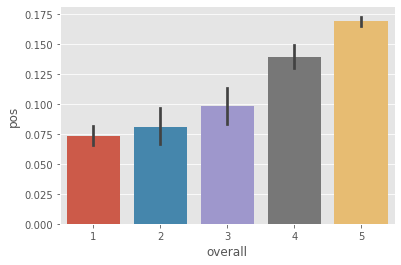

In [28]:
sns.barplot(data = vaders, x = 'overall', y = 'pos')

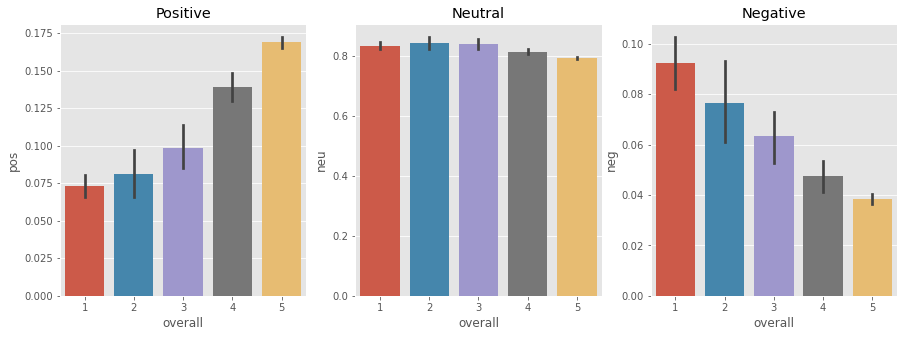

<Figure size 432x288 with 0 Axes>

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = vaders, x = 'overall', y = 'pos', ax=axs[0])
sns.barplot(data = vaders, x = 'overall', y = 'neu', ax=axs[1])
sns.barplot(data = vaders, x = 'overall', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()
plt.tight_layout()
plt.show()

In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [32]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [34]:
!pip install torch


In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
conda install pytorch torchvision -c pytorch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [39]:
print(review)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [40]:
sia.polarity_scores(review)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [43]:
#Run for the Roberta model
encoded_text = tokenizer(review, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.15133691, 'roberta_neu': 0.40594313, 'roberta_pos': 0.44271988}


In [44]:
def polarity_scores_roberta(review):
    encoded_text = tokenizer(review, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
    }
    return scores_dict

In [48]:
roberta_result

{'roberta_neg': 0.074959315,
 'roberta_neu': 0.589215,
 'roberta_pos': 0.33582562}

In [58]:
!pip install transformers


In [70]:
res = {}
sia = SentimentIntensityAnalyzer()

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myname = row['reviewerName']
        
        if isinstance(text, str):  # Check if the text is a string
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
        
            roberta_result = polarity_scores_roberta(text)  # Remove the square brackets around 'text'
            both = {**vader_result_rename, **roberta_result}
            res[myname] = both
        
            
        
        else:
            vader_result = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
            
        
    except RuntimeError:
                print(f' Broke for name {myname}')


 Broke for name A.Fenderson
 Broke for name Aleksandar Milivojevic
 Broke for name Brett in Denver
 Broke for name DMGenest | "Genet"
 Broke for name Hyoun Kim "Faluzure"
 Broke for name Lazer Fers
 Broke for name Lou Thomas
 Broke for name mad G.I.
 Broke for name Mark R. Wietstock
 Broke for name M. Stanley Bubien
 Broke for name NLee the Engineer
 Broke for name rbhatta "A Dinosaur you can trust!"
 Broke for name rpgmaker
 Broke for name Shawn Fallin
 Broke for name SkincareCEO
 Broke for name T. Brown "TB"
 Broke for name Tom Dowd
 Broke for name Tom Henriksen "Doggy Diner"



In [71]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'reviewerName'})
results_df = results_df.merge(df, how='left')

In [72]:
results_df.head()

,reviewerName,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,0.688,0.312,0.000,-0.2960,0.074959,0.589215,0.335826,0,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,0.075,0.925,0.000,-0.2960,0.007265,0.095529,0.897206,1,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,0.077,0.923,0.000,-0.3089,0.423757,0.448311,0.127933,2,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,0.000,0.909,0.091,0.7081,0.002447,0.019229,0.978324,3,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,0.038,0.835,0.127,0.7087,0.003552,0.067459,0.928989,4,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [73]:
## Compare Scores between Models

results_df.columns

Index(['reviewerName', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Unnamed: 0', 'overall',
       'reviewText', 'reviewTime', 'day_diff', 'helpful_yes', 'helpful_no',
       'total_vote', 'score_pos_neg_diff', 'score_average_rating',
       'wilson_lower_bound'],
      dtype='object')

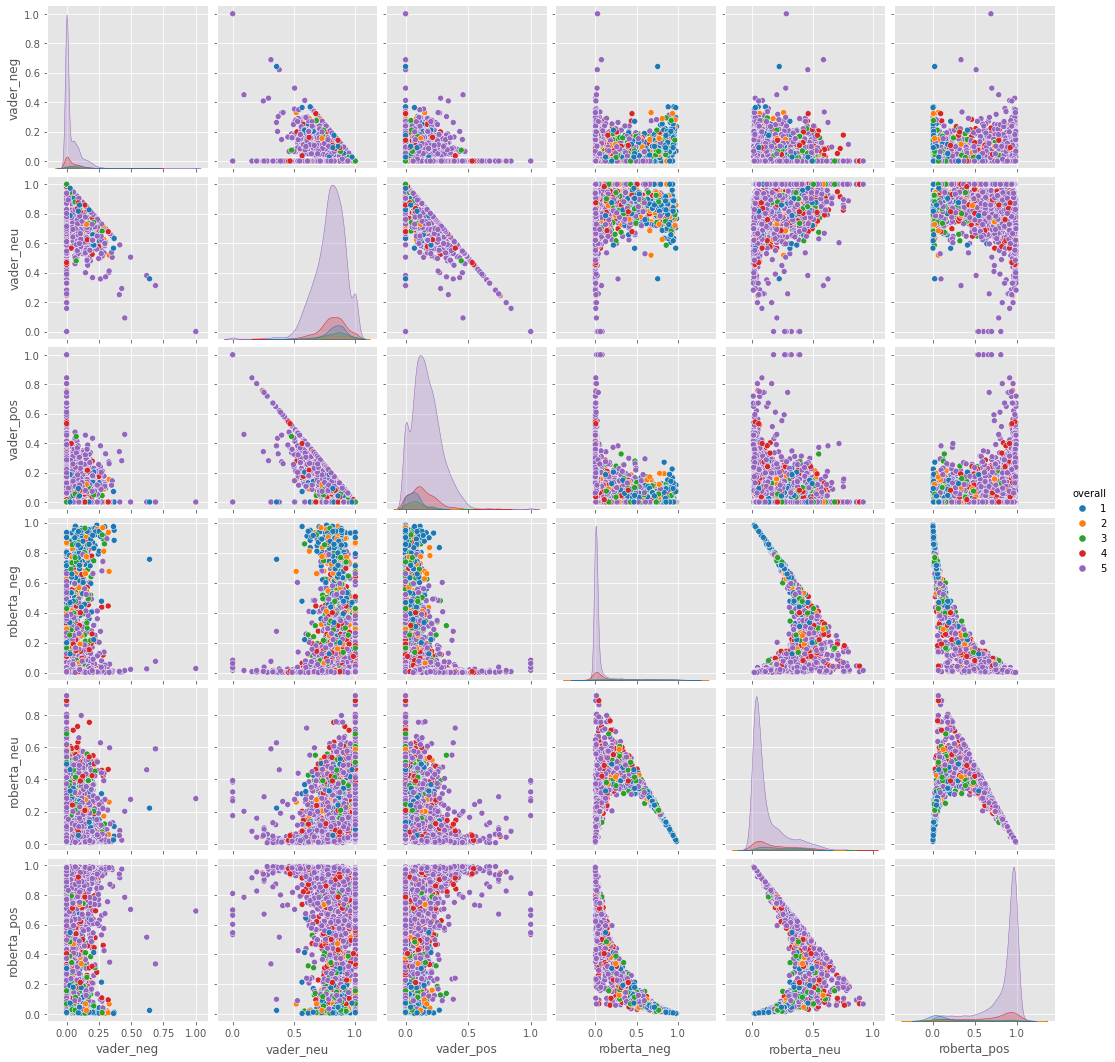

In [78]:
sns.pairplot(data = results_df,
            vars =['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'overall',
            palette = 'tab10')

plt.show()

In [80]:
#positive review with 1 star review
results_df.query('overall == 1') \
.sort_values ('roberta_pos', ascending = False) ['reviewText'].values [0]

'Ive had the card for over a month, using it in my Samsung Galaxy Note 10.1.I filled the card with a few TV shows and movies to watch on the go, as well as many PDFs and MS Word Docs.The MS Word and PDF files often get corrupted after use. THe larger files seem to stay intact. I moved the smaller files into the internal storage and havent had problem since.Im hoping Sandisk has a decent return policy.'

In [81]:
results_df.query('overall == 1') \
.sort_values ('vader_pos', ascending = False) ['reviewText'].values [0]

'Bought this for Galaxy S3, worked like a charm for 3 months & then I started getting error messages on phone stating the card has been taken out or that it is not there, went on like this for a week or so & then one day gone. Initially I thought it was problem with phone. Popped in a 2Gb card from BB & it worked. Popped this one into the BB & same, no detection. After spending so much on an SD card its disappointing to see it go bust outside of return period.'

In [82]:
# Negative sentiment with 5 star review
results_df.query('overall == 5') \
.sort_values ('roberta_neg', ascending = False) ['reviewText'].values [0]

'Got this on sale! What a deal!'

In [83]:
results_df.query('overall == 5') \
.sort_values ('vader_pos', ascending = False) ['reviewText'].values [0]

'Yes!'

In [85]:
# The transformer pipeline

from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
!pip install xformers

In [87]:
sent_pipeline('I love data analyis')

[{'label': 'POSITIVE', 'score': 0.9992200136184692}]

In [88]:
sent_pipeline('please give a review to our project')

[{'label': 'POSITIVE', 'score': 0.9993798732757568}]

In [89]:
sent_pipeline('i liked it very less')

[{'label': 'NEGATIVE', 'score': 0.999477207660675}]